Suppose you have been appointed as a data analyst in a biological research institute. You have been assigned a task of predicting the variety of seeds. The features are collected using scanned images of the seeds. You can use various features of the scanned image of seeds such as area, perimeter, etc. (refer seed.csv).

 A.    “Feature with more standard deviation has more information gain”.  Show the correctness/incorrectness of the statement through your calculations on the seed dataset.  You may use certain library functions for performing numeric computations wherever needed.

B.     Build a machine learning model using sklearn library to predict variety of the seed using the seed dataset. Show your results for gini index and entropy. Also print the decision tree for a depth of 3.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing the dataset seed.csv

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/seed.csv')
df.head()

,Area,Perimeter,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
0,28395.0,610.291,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,V1
1,28734.0,638.018,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,V1
2,29380.0,624.110,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,V1
3,30008.0,645.884,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,V1
4,30140.0,620.134,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,V1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Class = le.fit_transform(df.Class)
df.head()

,Area,Perimeter,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
0,28395.0,610.291,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0
1,28734.0,638.018,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0
2,29380.0,624.110,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0
3,30008.0,645.884,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0
4,30140.0,620.134,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           3349 non-null   float64
 1   Perimeter      3349 non-null   float64
 2   ConvexArea     3349 non-null   float64
 3   EquivDiameter  3349 non-null   float64
 4   Extent         3349 non-null   float64
 5   Solidity       3349 non-null   float64
 6   roundness      3349 non-null   float64
 7   Compactness    3349 non-null   float64
 8   Class          13611 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 957.1 KB


Dropping rows with "NA"

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3349 entries, 0 to 3348
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           3349 non-null   float64
 1   Perimeter      3349 non-null   float64
 2   ConvexArea     3349 non-null   float64
 3   EquivDiameter  3349 non-null   float64
 4   Extent         3349 non-null   float64
 5   Solidity       3349 non-null   float64
 6   roundness      3349 non-null   float64
 7   Compactness    3349 non-null   float64
 8   Class          3349 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 261.6 KB


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'ConvexArea'}>],
       [<Axes: title={'center': 'EquivDiameter'}>,
        <Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>],
       [<Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>,
        <Axes: title={'center': 'Class'}>]], dtype=object)

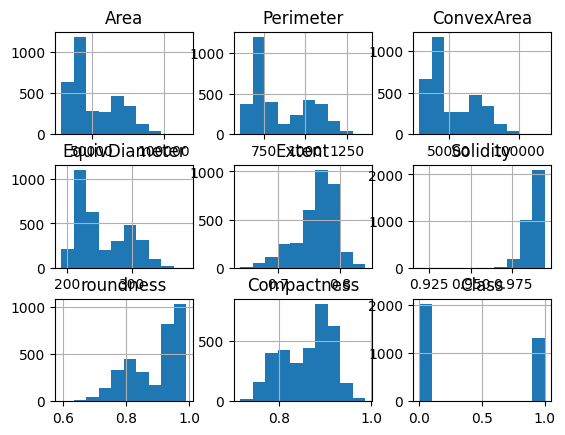

In [ ]:
df.hist()

<Axes: >

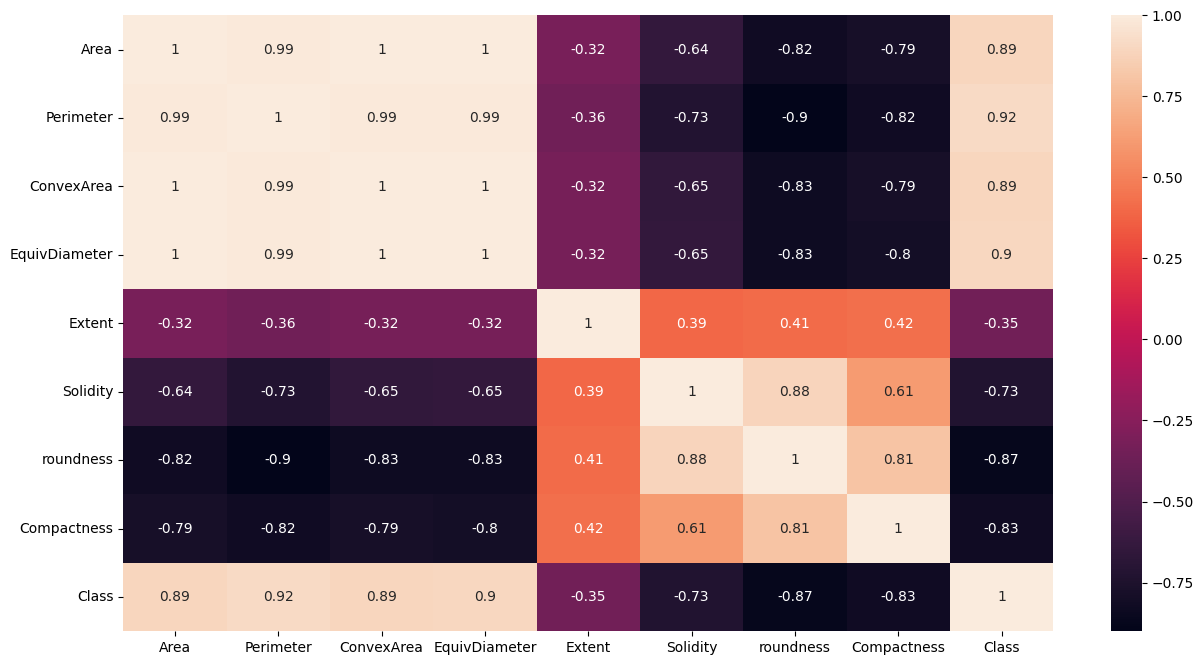

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

 A.    “Feature with more standard deviation has more information gain”.  Show the correctness/incorrectness of the statement through your calculations on the seed dataset.  You may use certain library functions for performing numeric computations wherever needed. 

In [ ]:
# Calculate information gain for all attributes
def calculate_information_gain(X, y):
    entropy_parent = entropy(y)
    n_samples = len(y)
    information_gains = []
    for feature in X.columns:
        unique_values = X[feature].unique()
        entropy_weighted_sum = 0
        for value in unique_values:
            indices = X[feature] == value
            y_subset = y[indices]
            entropy_subset = entropy(y_subset)
            weight = len(y_subset) / n_samples
            entropy_weighted_sum += weight * entropy_subset
        information_gain = entropy_parent - entropy_weighted_sum
        information_gains.append((feature, information_gain))
    return information_gains

# Calculate entropy of a target variable
def entropy(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    probabilities = class_counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
information_gains = calculate_information_gain(X,y)
gain_list = []
for feature, gain in information_gains:
    gain_list.append(gain)
    print("Attribute:",feature,"with Information Gain:",gain)

Attribute: Area with Information Gain: 0.9665989219397487
Attribute: Perimeter with Information Gain: 0.967793308323744
Attribute: ConvexArea with Information Gain: 0.9665989219397487
Attribute: EquivDiameter with Information Gain: 0.9665989219397487
Attribute: Extent with Information Gain: 0.9671961151317464
Attribute: Solidity with Information Gain: 0.967793308323744
Attribute: roundness with Information Gain: 0.967793308323744
Attribute: Compactness with Information Gain: 0.967793308323744


In [ ]:
(gain_list)

[0.9665989219397487,
 0.967793308323744,
 0.9665989219397487,
 0.9665989219397487,
 0.9671961151317464,
 0.967793308323744,
 0.967793308323744,
 0.967793308323744]

In [ ]:
from statistics import *
features = ['Area','Perimeter','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness']
stdev_list = []
for feature in features:
  std = stdev(np.array(df[feature]))
  stdev_list.append(std)
  print("Attribute:",feature,"with Standard Deviation:",std)

Attribute: Area with Standard Deviation: 16413.178606955065
Attribute: Perimeter with Standard Deviation: 169.67322683123203
Attribute: ConvexArea with Standard Deviation: 16828.627216289453
Attribute: EquivDiameter with Standard Deviation: 39.361511300120235
Attribute: Extent with Standard Deviation: 0.03129979129343581
Attribute: Solidity with Standard Deviation: 0.005055594629768679
Attribute: roundness with Standard Deviation: 0.08081638940107896
Attribute: Compactness with Standard Deviation: 0.05437469314187769


In [ ]:
stdev_list

[16413.178606955065,
 169.67322683123203,
 16828.627216289453,
 39.361511300120235,
 0.03129979129343581,
 0.005055594629768679,
 0.08081638940107896,
 0.05437469314187769]

Calculating Corrrelation between Standard Deviation And Information Gain in The Feature Vectors

In [ ]:
c = correlation(stdev_list,gain_list)
c

-0.7000709969781018

Show the correctness/incorrectness of the statement : "Feature with more standard deviation has more information gain"

In [ ]:
if c > 0:
  print("Positive Correlation\nThe statement is correct\nFeature with more standard deviation has more information gain")
elif c < 0:
  print("Negative Correlation\nThe statement is incorrect\nFeature with more standard deviation don't have more information gain")
else:
  print("No Correlation\nThe statement is incorrect:Feature with more standard deviation don't have more information gain")

Negative Correlation
The statement is incorrect
Feature with more standard deviation don't have more information gain


B.     Build a machine learning model using sklearn library to predict variety of the seed using the seed dataset. Show your results for gini index and entropy. Also print the decision tree for a depth of 3.

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']
X

,Area,Perimeter,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness
0,28395.0,610.291,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358
1,28734.0,638.018,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861
2,29380.0,624.110,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774
3,30008.0,645.884,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329
4,30140.0,620.134,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516
...,...,...,...,...,...,...,...,...
3344,100846.0,1297.770,102015.0,358.331013,0.792036,0.988541,0.752442,0.763567
3345,102015.0,1271.970,103901.0,360.401904,0.804973,0.981848,0.792356,0.788985
3346,102379.0,1296.377,104111.0,361.044307,0.739412,0.983364,0.765523,0.790512
3347,105542.0,1265.623,107112.0,366.579116,0.747888,0.985342,0.827993,0.786421


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3344    1
3345    1
3346    1
3347    1
3348    1
Name: Class, Length: 3349, dtype: int64

Normalizing/Scaling the feature vector

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.41969203, -1.4328578 , -1.40825139, ...,  0.29364318,
         0.87228002,  0.9706361 ],
       [-1.39903481, -1.26941928, -1.38109123, ..., -0.47203806,
        -0.00630527,  1.7156359 ],
       [-1.35967032, -1.35140085, -1.35030575, ...,  0.4326733 ,
         0.7463257 ,  0.88632849],
       ...,
       [ 3.08857842,  2.61131857,  3.07264049, ..., -0.79285792,
        -1.51007219, -1.28894503],
       [ 3.28131819,  2.43003721,  3.2509942 , ..., -0.40144394,
        -0.73697182, -1.36419505],
       [ 3.91657338,  2.98495127,  3.927621  , ..., -1.72556029,
        -1.22984579, -0.10386373]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

(i)Using Gini index

Creating and Fitting Our Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3,criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Predicted And Actual Testing Target Values

In [ ]:
y_pred=np.array(clf.predict(X_test))
print('Predicted Values = ',end =' ')
print(le.inverse_transform(y_pred))
print('\nActual Values = ',end =' ')
print(le.inverse_transform(y_test))

Predicted Values =  ['V1' 'V2' 'V1' 'V1' 'V2' 'V1' 'V2' 'V2' 'V1' 'V1' 'V2' 'V2' 'V2' 'V2'
 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1'
 'V1' 'V1' 'V2' 'V2' 'V1' 'V1' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1'
 'V2' 'V1' 'V1' 'V1' 'V2' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V2' 'V1' 'V1'
 'V1' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1'
 'V2' 'V1' 'V2' 'V1' 'V1' 'V2' 'V1' 'V1' 'V2' 'V1' 'V2' 'V2' 'V1' 'V2'
 'V2' 'V1' 'V1' 'V2' 'V2' 'V1' 'V2' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1' 'V2'
 'V2' 'V1' 'V1' 'V2' 'V2' 'V1' 'V2' 'V2' 'V2' 'V1' 'V2' 'V1' 'V1' 'V1'
 'V1' 'V2' 'V2' 'V1' 'V1' 'V2' 'V2' 'V1' 'V1' 'V2' 'V2' 'V2' 'V1' 'V2'
 'V1' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1' 'V1' 'V1' 'V1' 'V2' 'V1'
 'V2' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V2' 'V1' 'V2' 'V1' 'V2' 'V2'
 'V1' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1'
 'V2' 'V1' 'V2' 'V2' 'V2' 'V1' 'V2' 'V1' 'V2' 'V1' 'V2' 'V1' 'V2' 'V1'
 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1' 'V1' 'V1' 'V1' 'V2' '

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print("The accuracy score with the model using scikit/sklearn using Gini= ",accuracy_score(y_test, y_pred)*100,"%")
print("The precision score with the model using scikit/sklearn using Gini= ",precision_score(y_test, y_pred,average='micro')*100,"%")

The accuracy score with the model using scikit/sklearn using Gini=  98.92601431980907 %
The precision score with the model using scikit/sklearn using Gini=  98.92601431980907 %


Graph of the DecisionTree model using Gini and Depth  = 3

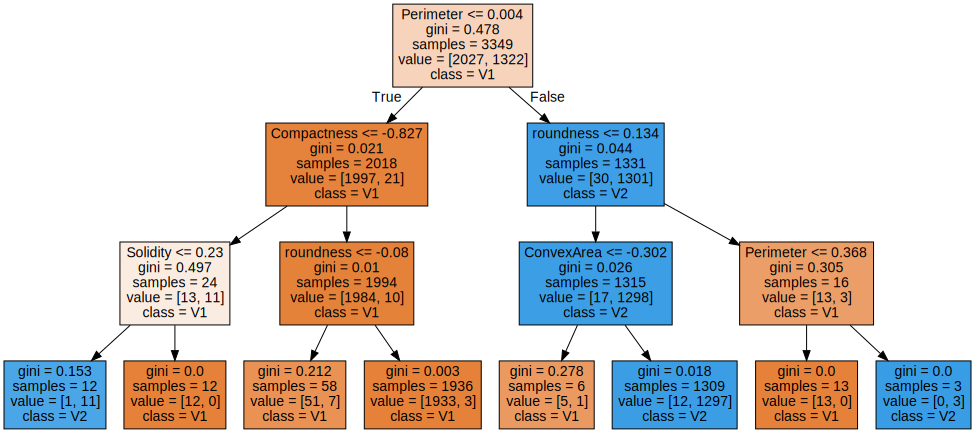

In [ ]:
clf.fit(X, y)
from sklearn import tree
import graphviz

features = ['Area','Perimeter','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness']
cn = ['V1','V2']
dot_data = tree.export_graphviz(clf, feature_names=features,class_names=cn, filled=True)
graph = graphviz.Source(dot_data)
graph.format = 'svg'
graph.render('decision_tree')

graph

(ii)Using entropy index

Creating and Fitting Our Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Predicted And Actual Testing Target Values

In [ ]:
y_pred=np.array(clf.predict(X_test))
print('Predicted Values = ',end =' ')
print(le.inverse_transform(y_pred))
print('\nActual Values = ',end =' ')
print(le.inverse_transform(y_test))

Predicted Values =  ['V1' 'V2' 'V1' 'V1' 'V2' 'V1' 'V2' 'V2' 'V1' 'V1' 'V2' 'V2' 'V2' 'V2'
 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1'
 'V1' 'V1' 'V2' 'V2' 'V1' 'V1' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1'
 'V2' 'V1' 'V1' 'V1' 'V2' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V2' 'V1' 'V1'
 'V1' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1'
 'V2' 'V1' 'V2' 'V1' 'V1' 'V2' 'V1' 'V1' 'V2' 'V1' 'V2' 'V2' 'V1' 'V2'
 'V2' 'V1' 'V1' 'V2' 'V2' 'V1' 'V2' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1' 'V2'
 'V2' 'V1' 'V1' 'V2' 'V2' 'V1' 'V2' 'V2' 'V2' 'V1' 'V2' 'V1' 'V1' 'V1'
 'V1' 'V2' 'V2' 'V1' 'V1' 'V2' 'V2' 'V1' 'V1' 'V2' 'V2' 'V2' 'V1' 'V2'
 'V1' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1' 'V1' 'V1' 'V1' 'V2' 'V1'
 'V2' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V2' 'V1' 'V2' 'V1' 'V2' 'V2'
 'V1' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1'
 'V2' 'V1' 'V2' 'V2' 'V2' 'V1' 'V2' 'V1' 'V2' 'V1' 'V2' 'V1' 'V2' 'V1'
 'V1' 'V1' 'V2' 'V1' 'V1' 'V1' 'V1' 'V1' 'V1' 'V1' 'V2' '

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print("The accuracy score with the model using scikit/sklearn using Entropy= ",accuracy_score(y_test, y_pred)*100,"%")
print("The precision score with the model using scikit/sklearn using Entropy= ",precision_score(y_test, y_pred,average='micro')*100,"%")

The accuracy score with the model using scikit/sklearn using Entropy=  98.09069212410502 %
The precision score with the model using scikit/sklearn using Entropy=  98.09069212410502 %


Graph of the DecisionTree model using Entropy and Depth  = 3

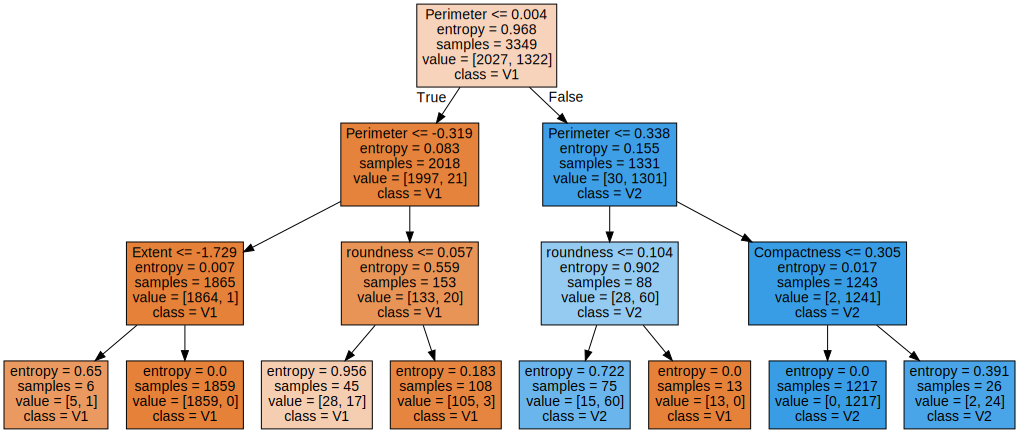

In [ ]:
clf.fit(X, y)
from sklearn import tree
import graphviz

features = ['Area','Perimeter','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness']
cn = ['V1','V2']
dot_data = tree.export_graphviz(clf, feature_names=features,class_names=cn, filled=True)
graph = graphviz.Source(dot_data)
graph.format = 'svg'
graph.render('decision_tree')

graph